In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import yaml
from torch.utils.data import DataLoader
from utils import plot_imgs
from superpoint.data.Synthetic_dataset import SyntheticShapes
import os.path as osp

In [2]:
config_path = osp.realpath(osp.join(osp.abspath('..'), 'configs\\magicpoint_syn.yaml'))

with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

config["data"]["augmentation"]["photometric"]["enable_train"] = False
dataset = SyntheticShapes(config["data"], task="train",device="cpu")
data_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0,collate_fn=dataset.batch_collator)
data_loader = iter(data_loader)


***Synthetic Shapes - Photometric and Homographic data augmentation***

In [3]:
def draw_keypoints(img, corners, color):
    keypoints = [cv2.KeyPoint(int(c[1]), int(c[0]), 0.2) for c in np.stack(corners).T]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)
def draw_overlay(img, mask, color=[0, 0, 255], op=0.5):
    img[np.where(mask)] = img[np.where(mask)]*(1-op) + np.array(color)*op
def display(d):
    img = draw_keypoints(d["raw"]['image'][0,0,...].cpu().numpy() * 255, np.where(d["raw"]['kpts_heatmap'][0,...].cpu().numpy()), (0, 255, 0))
    draw_overlay(img, np.logical_not(d["raw"]['valid_mask'][0,...].cpu().numpy()), [255, 0, 0])
    return img

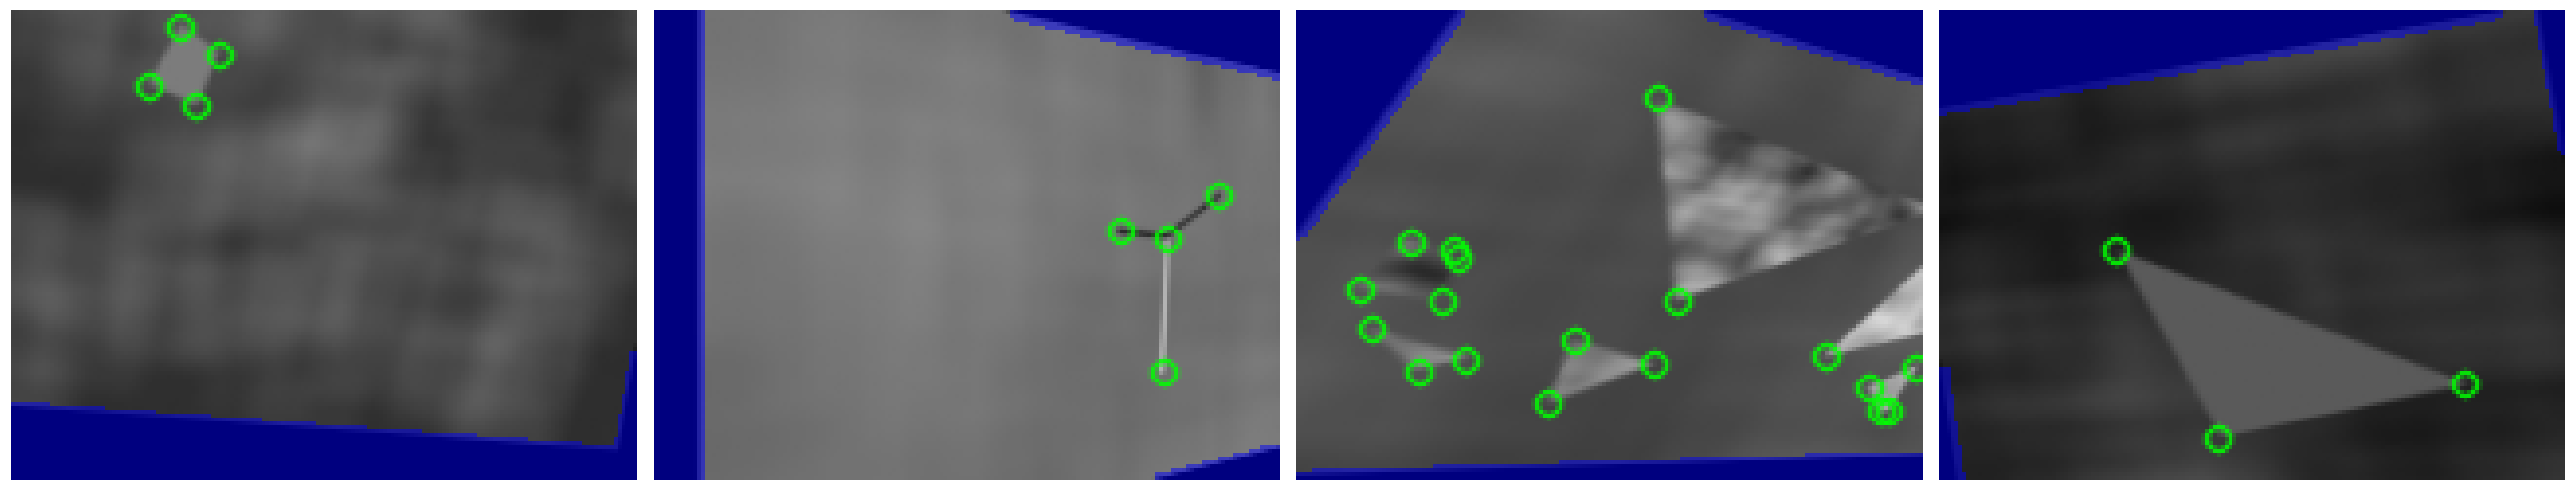

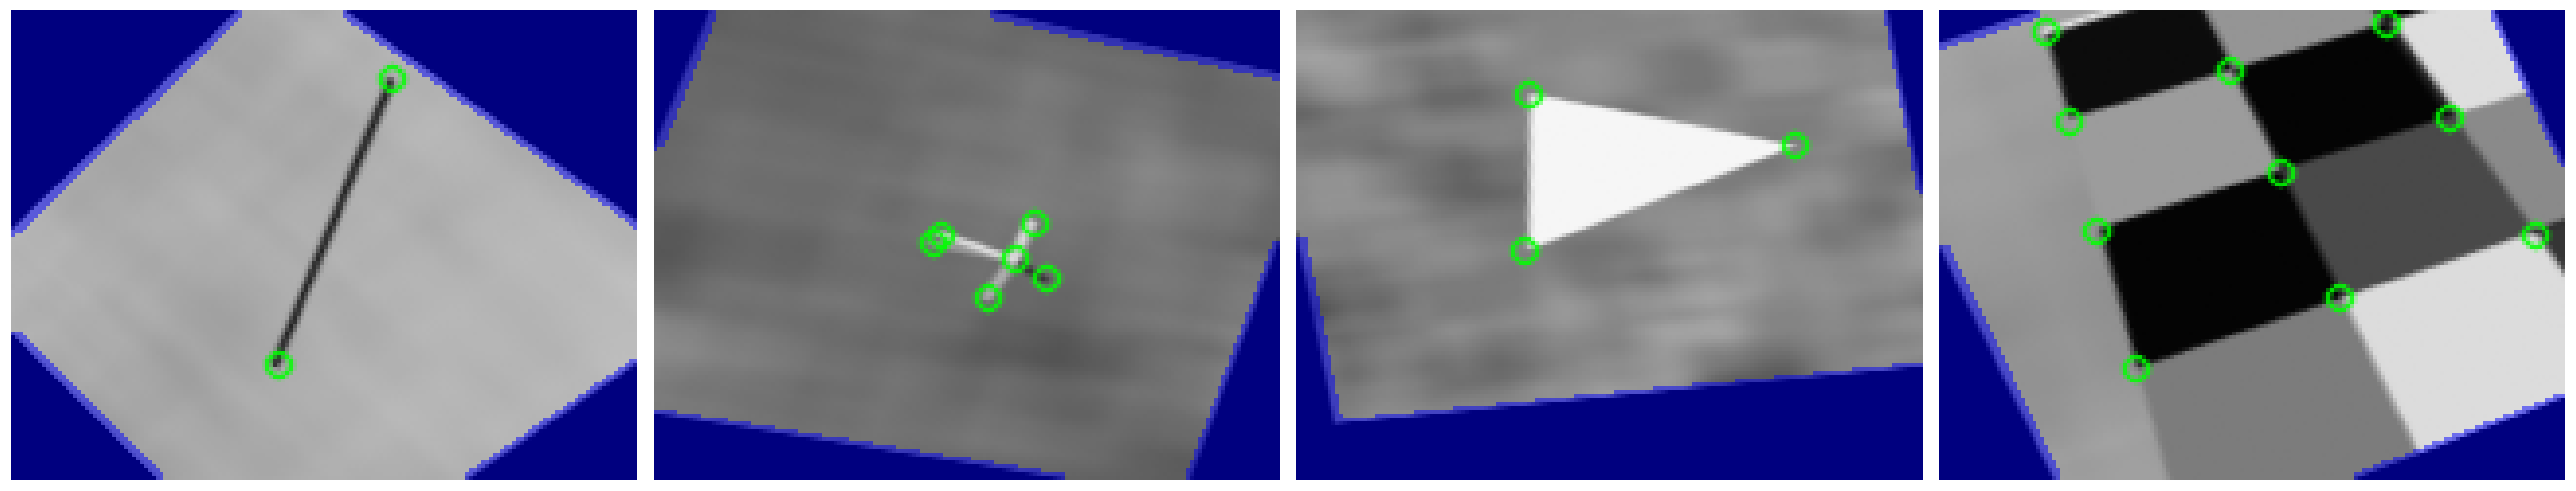

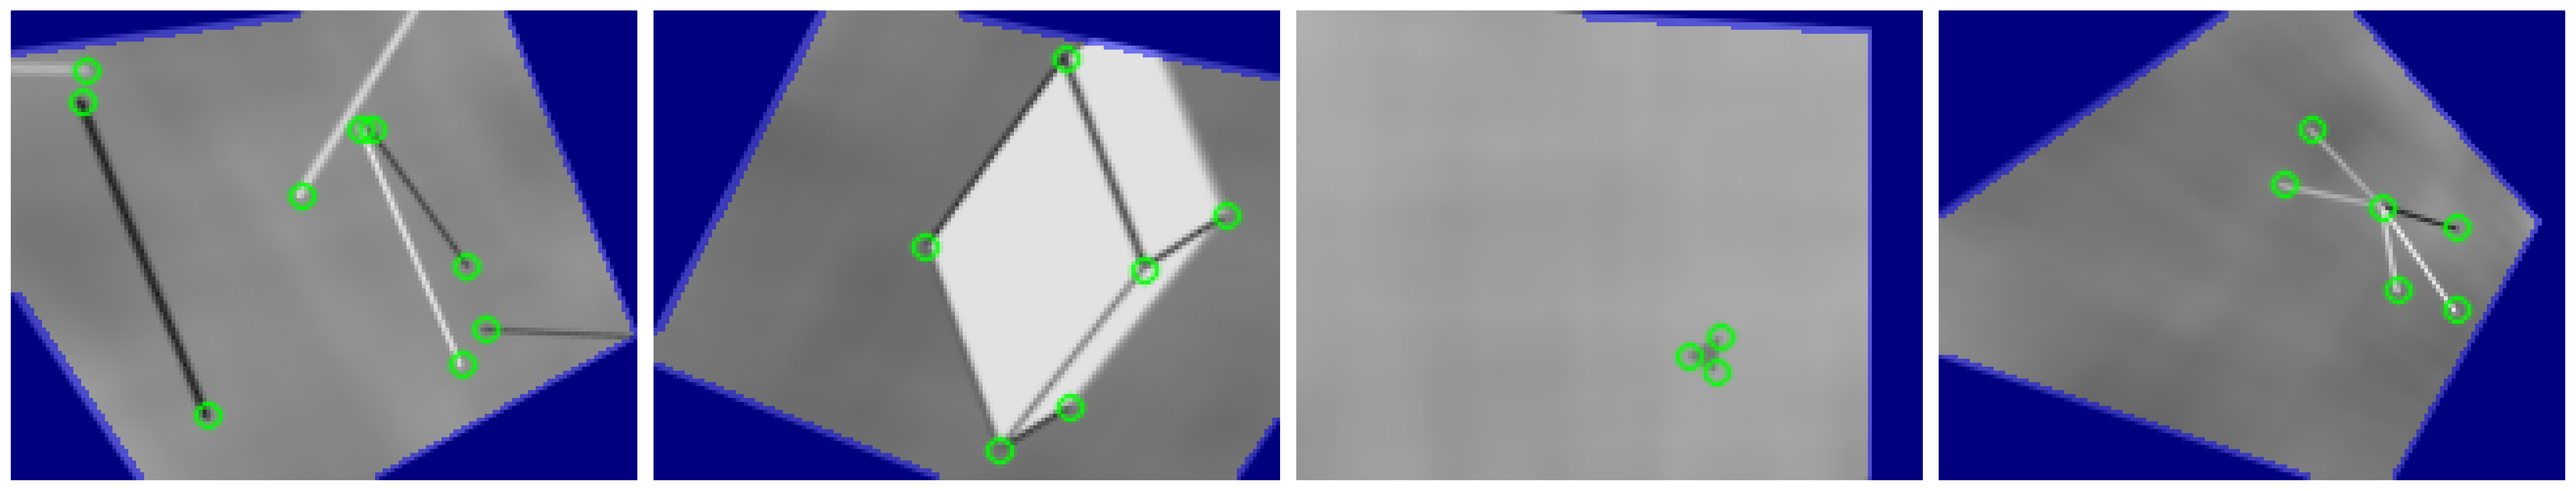

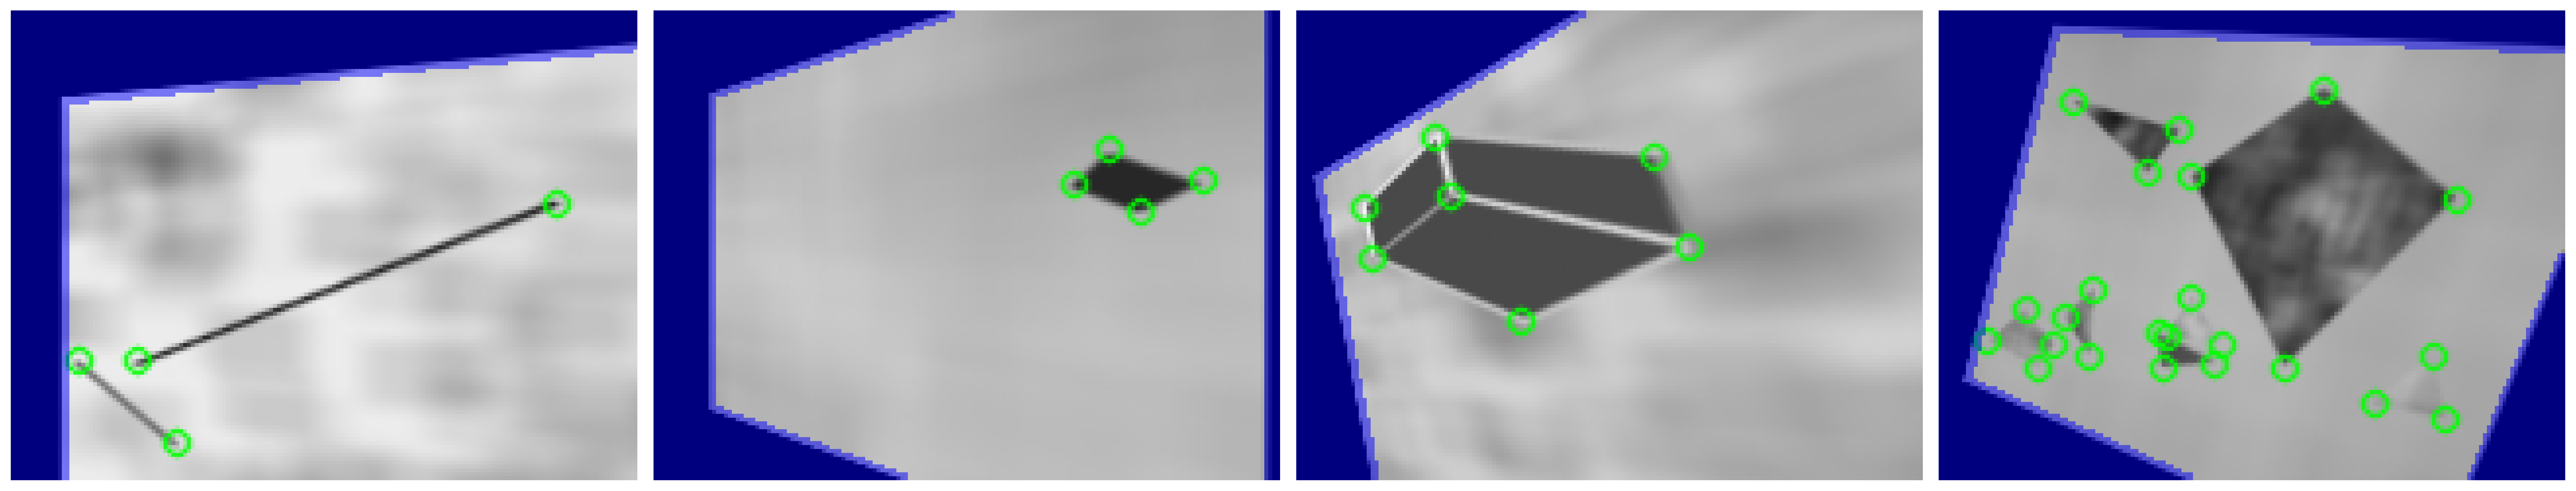

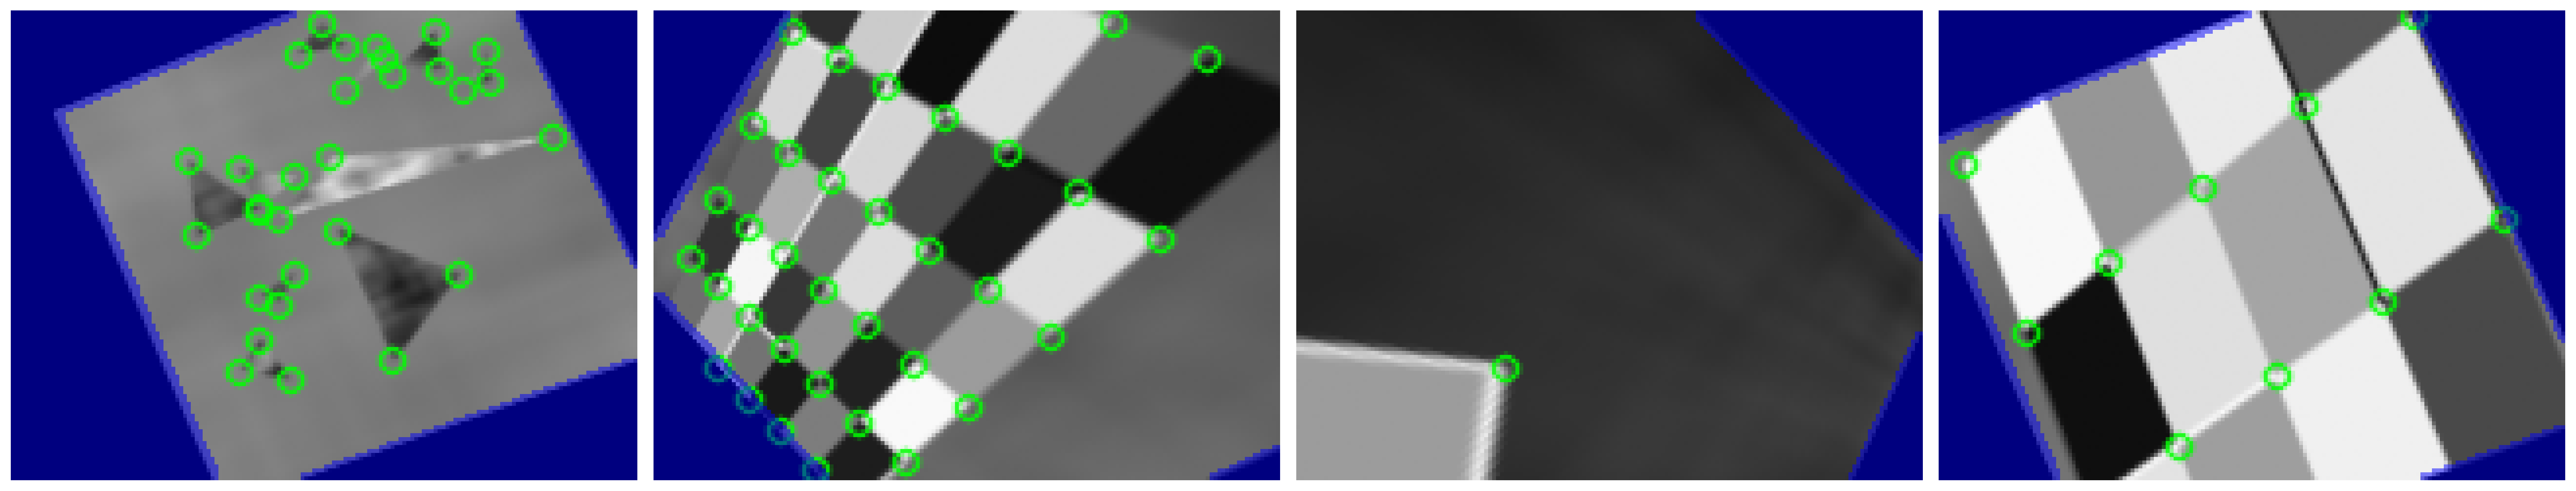

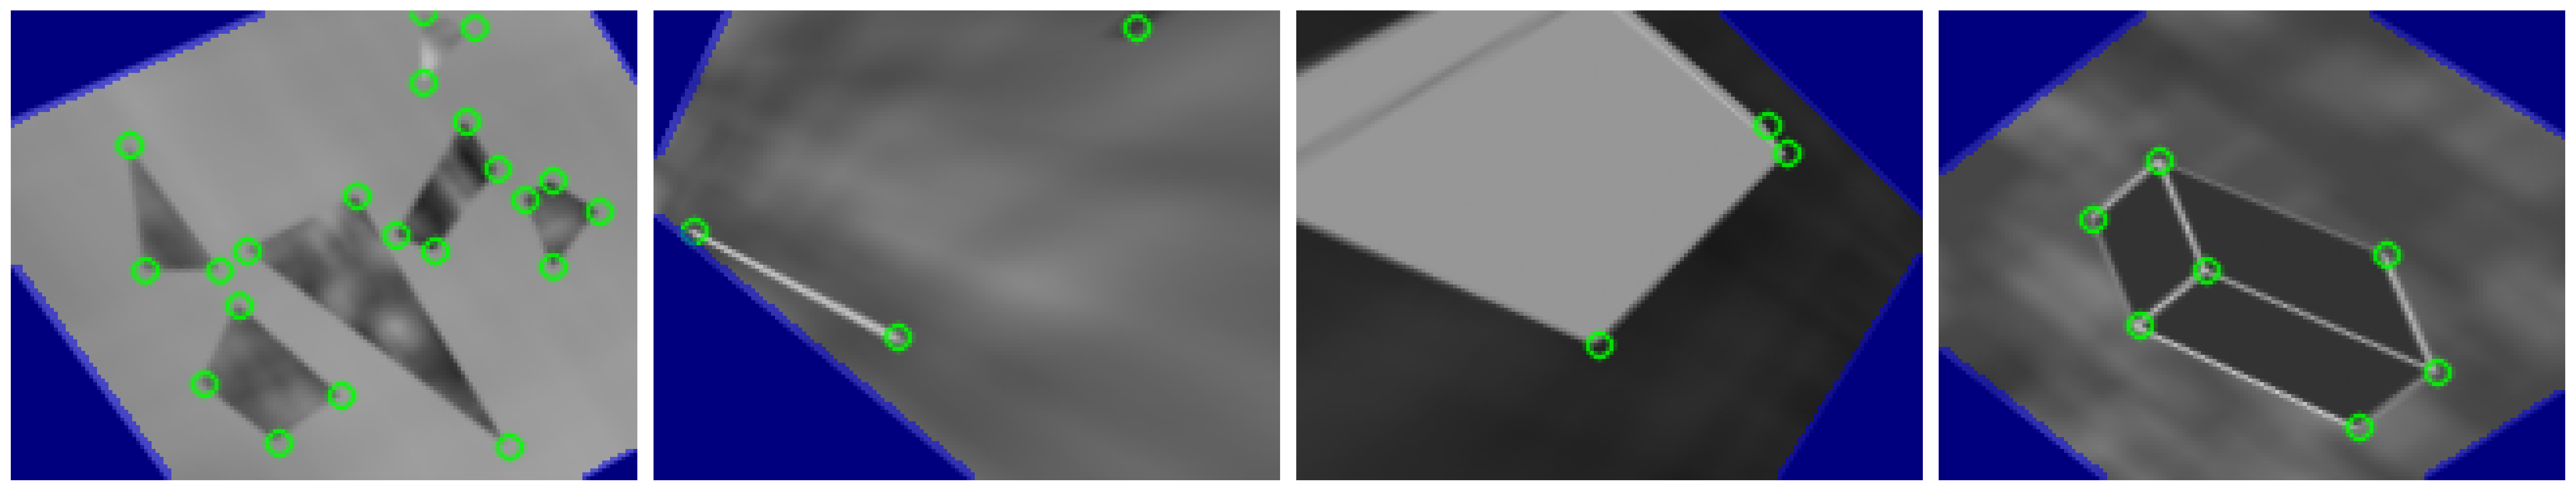

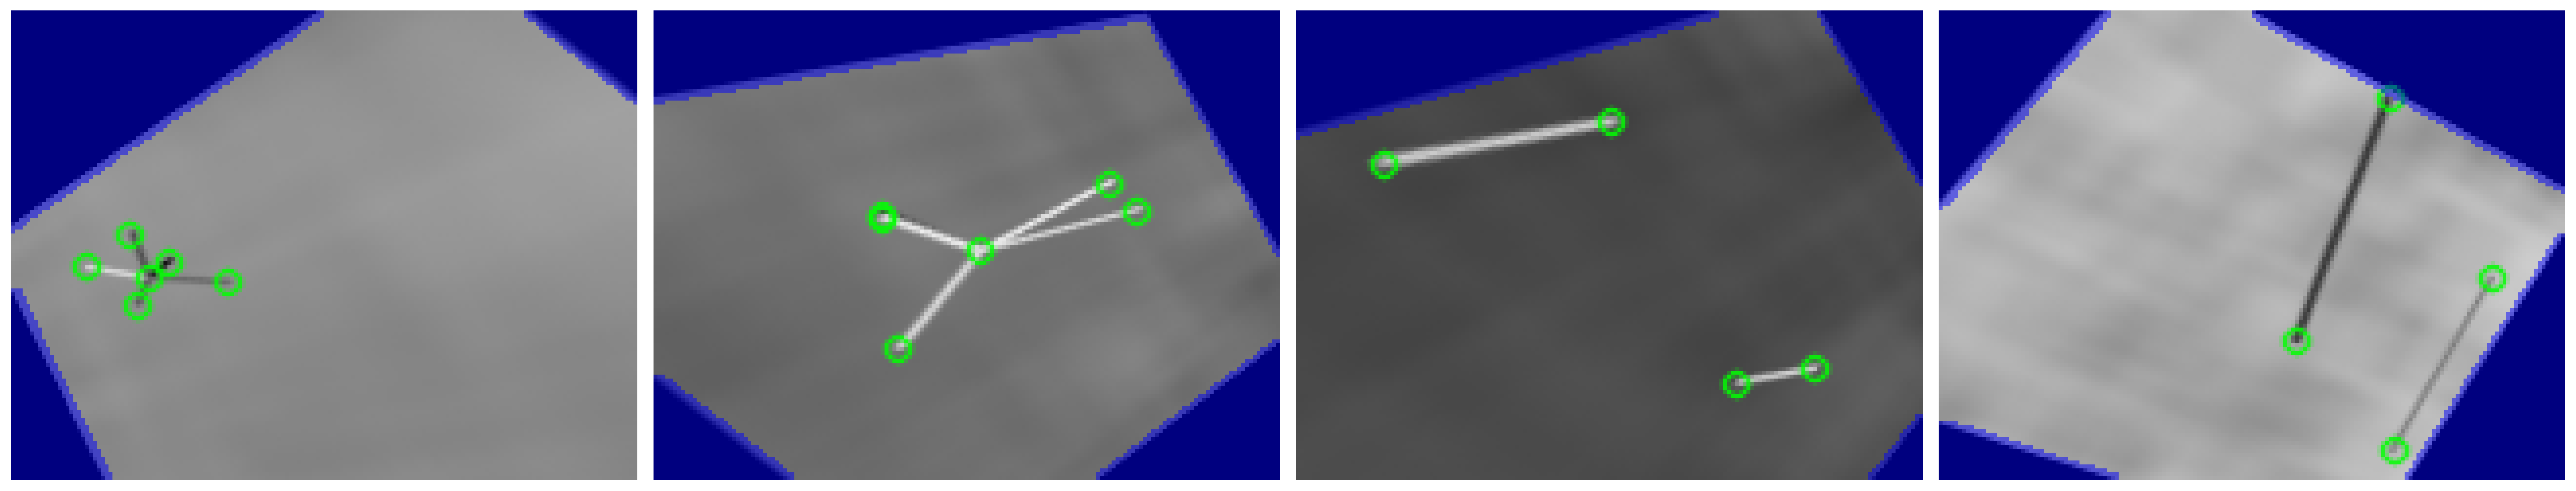

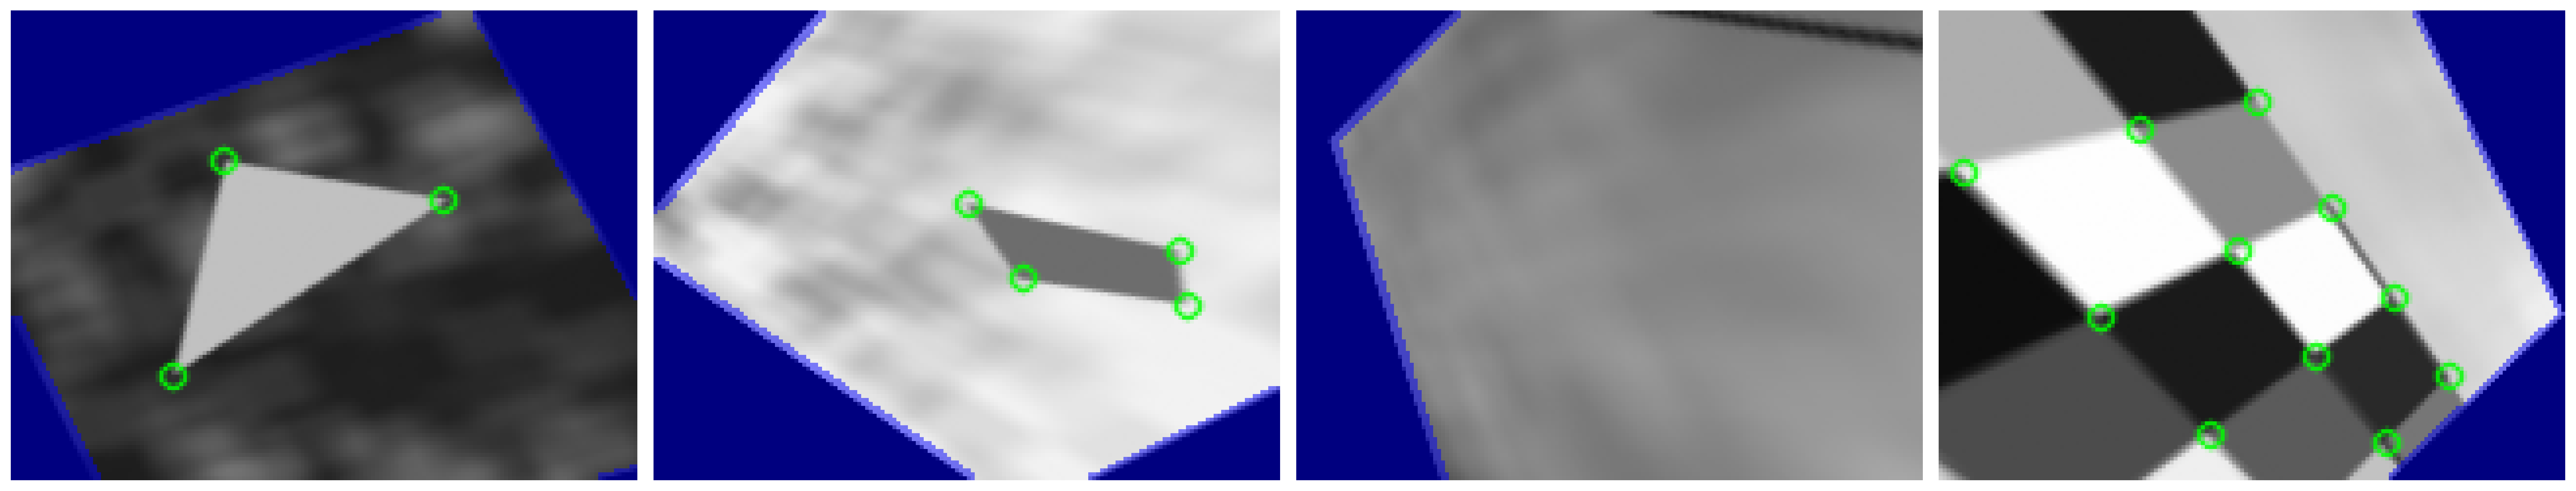

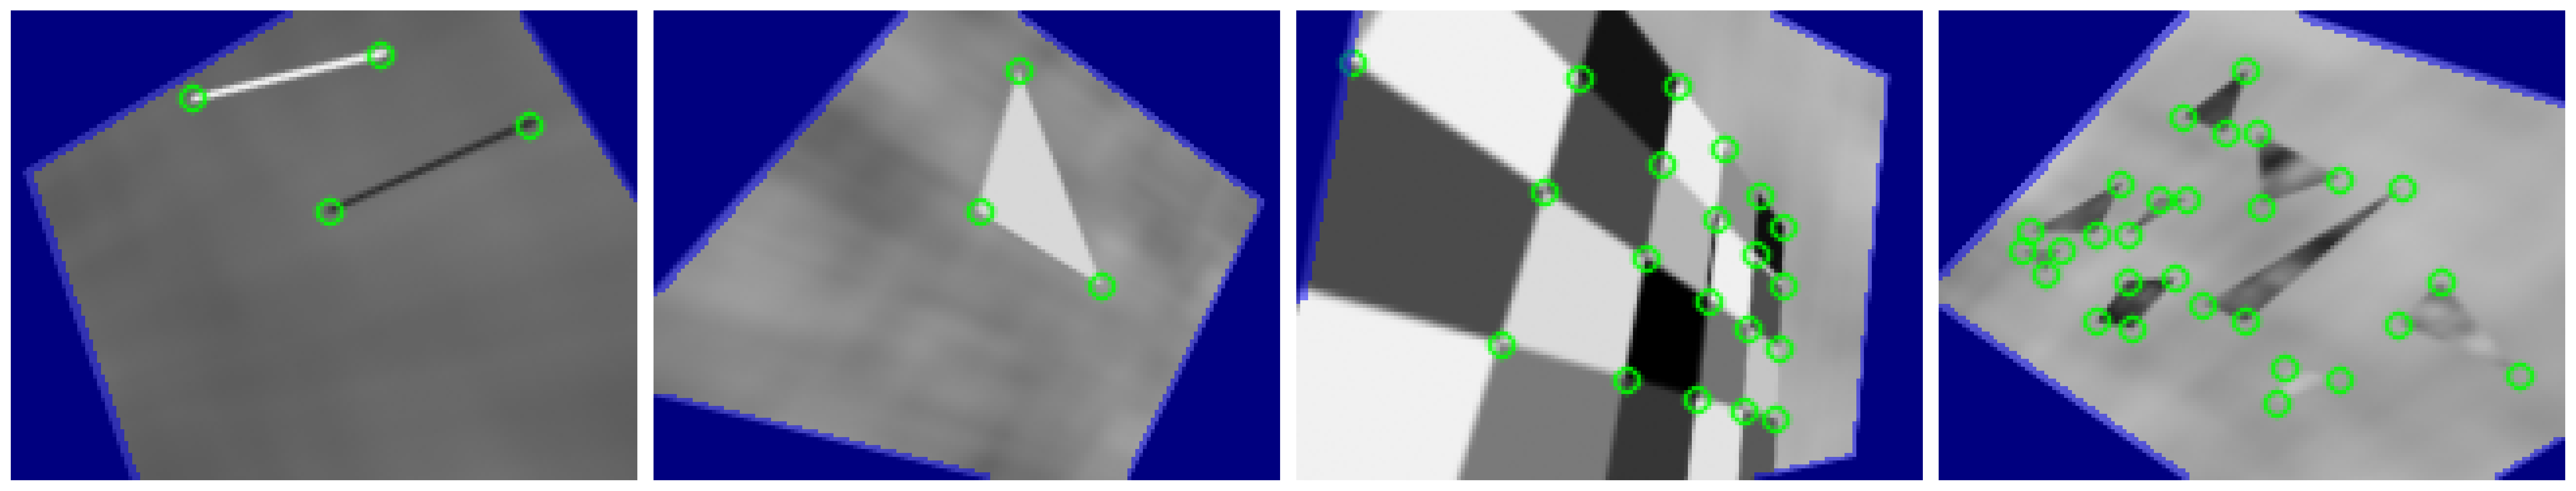

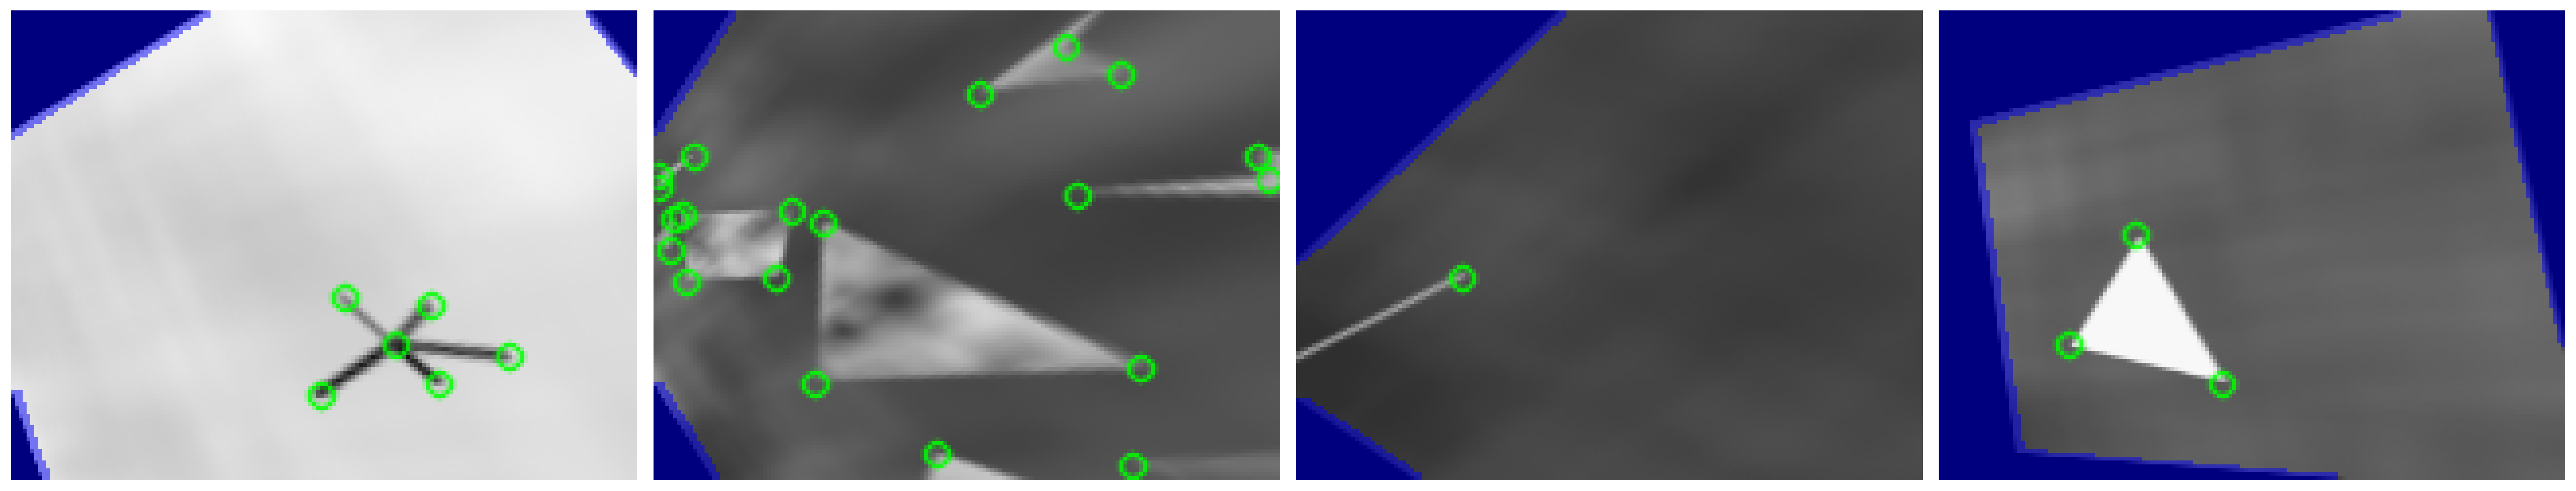

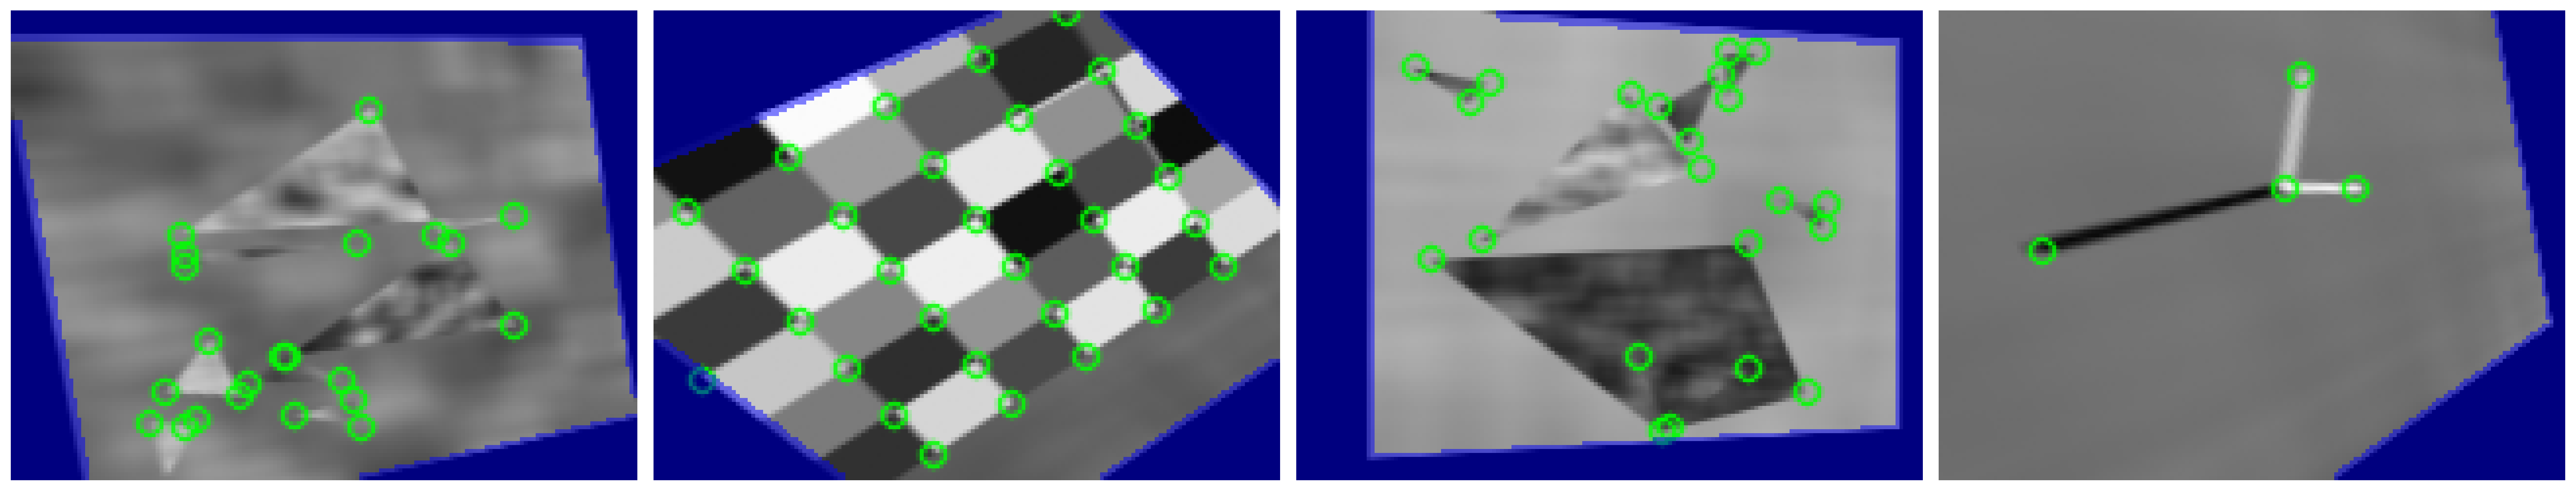

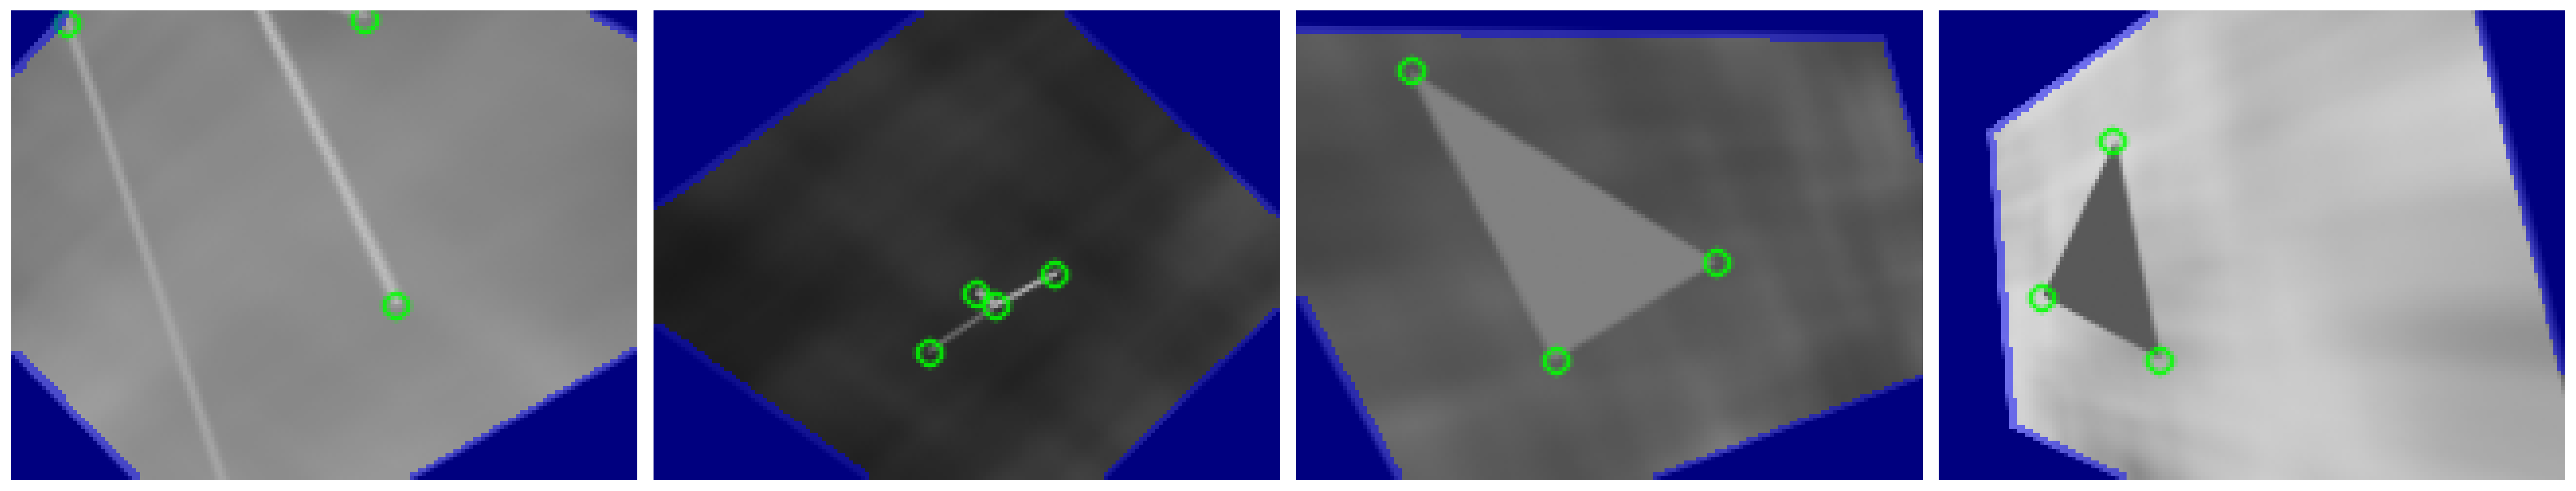

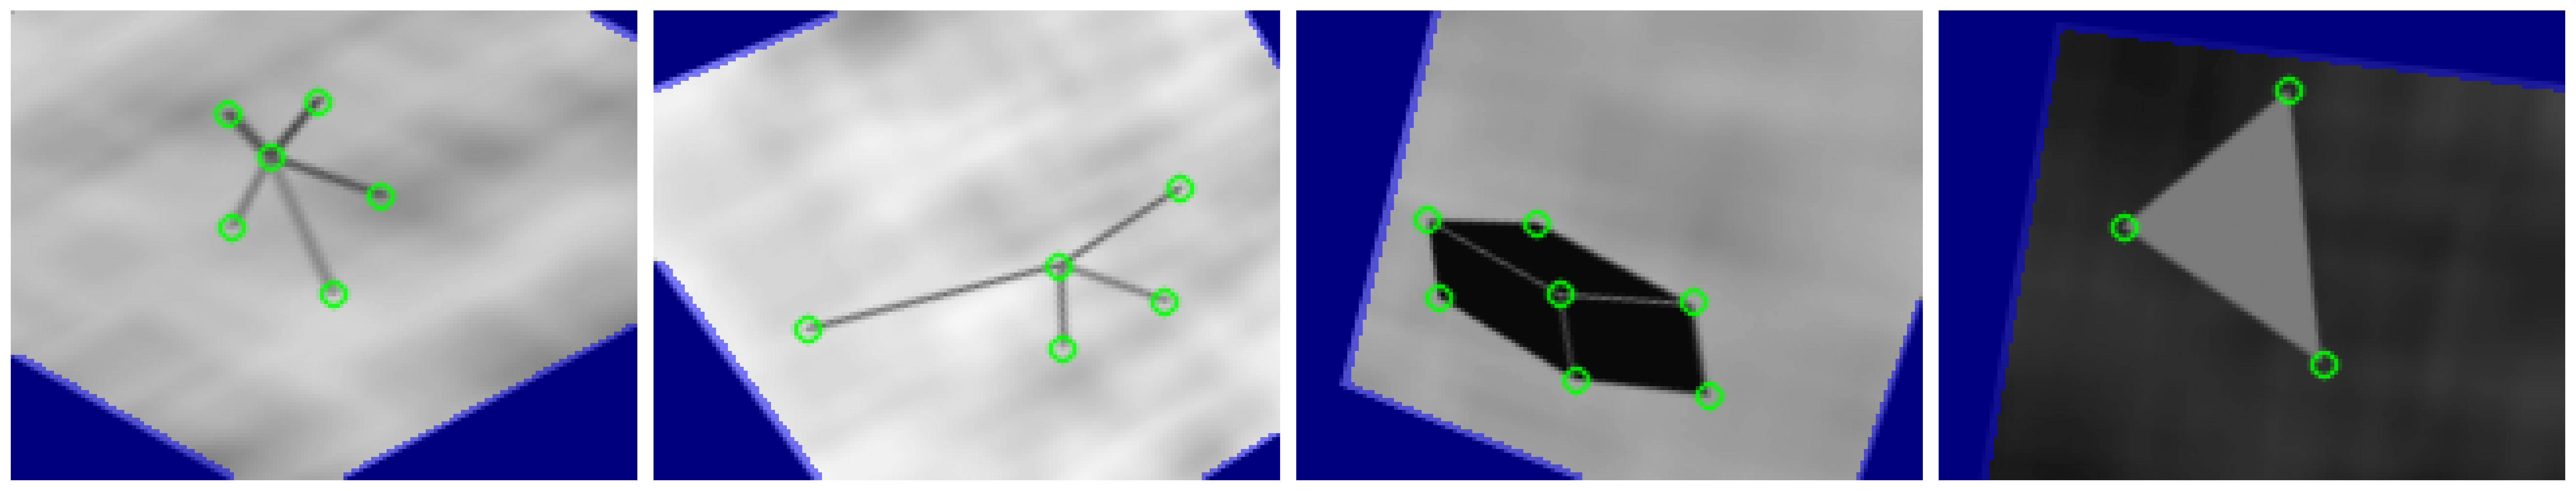

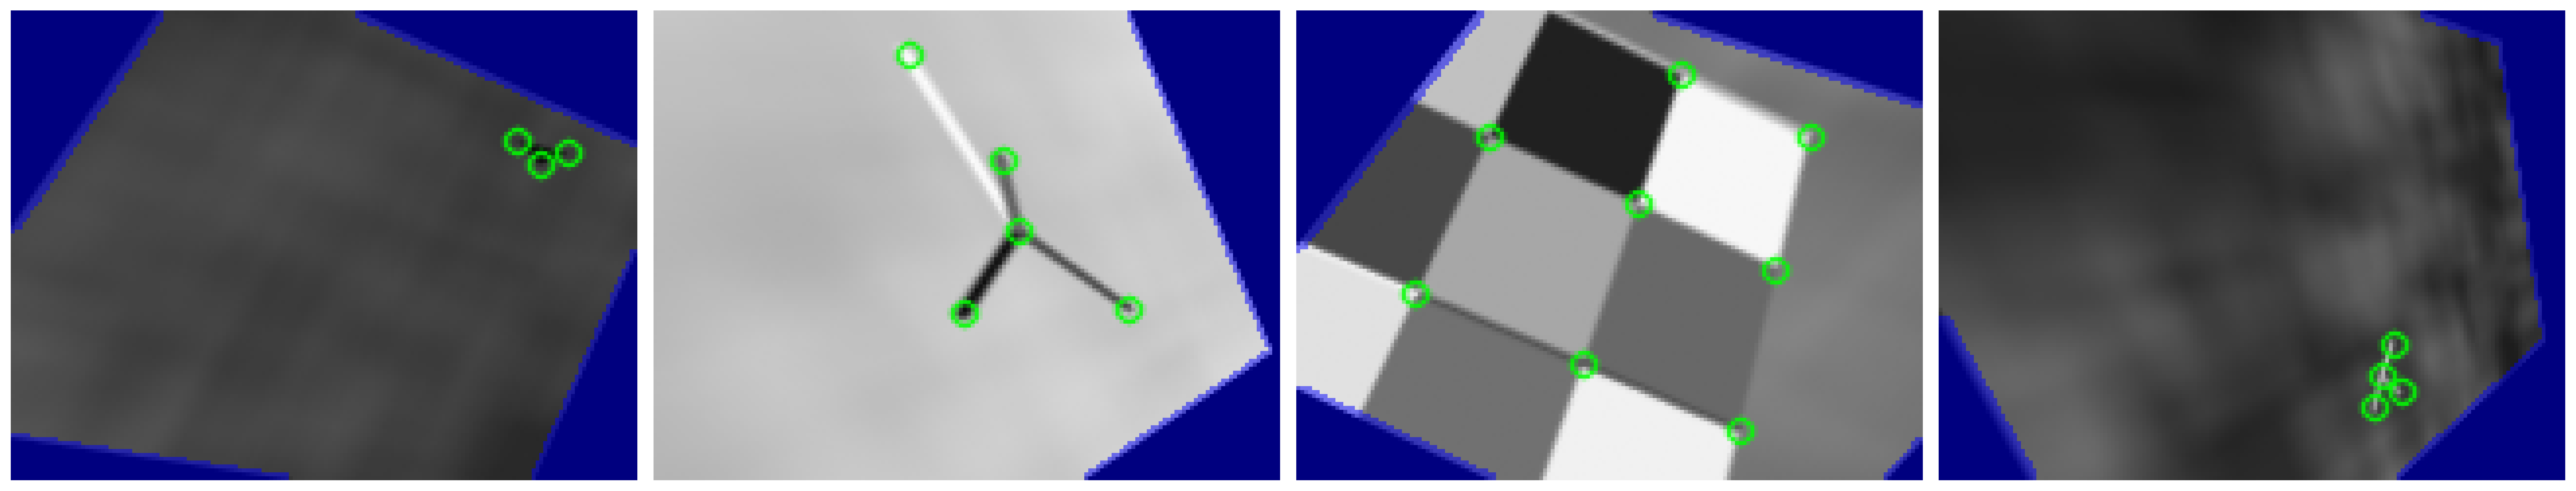

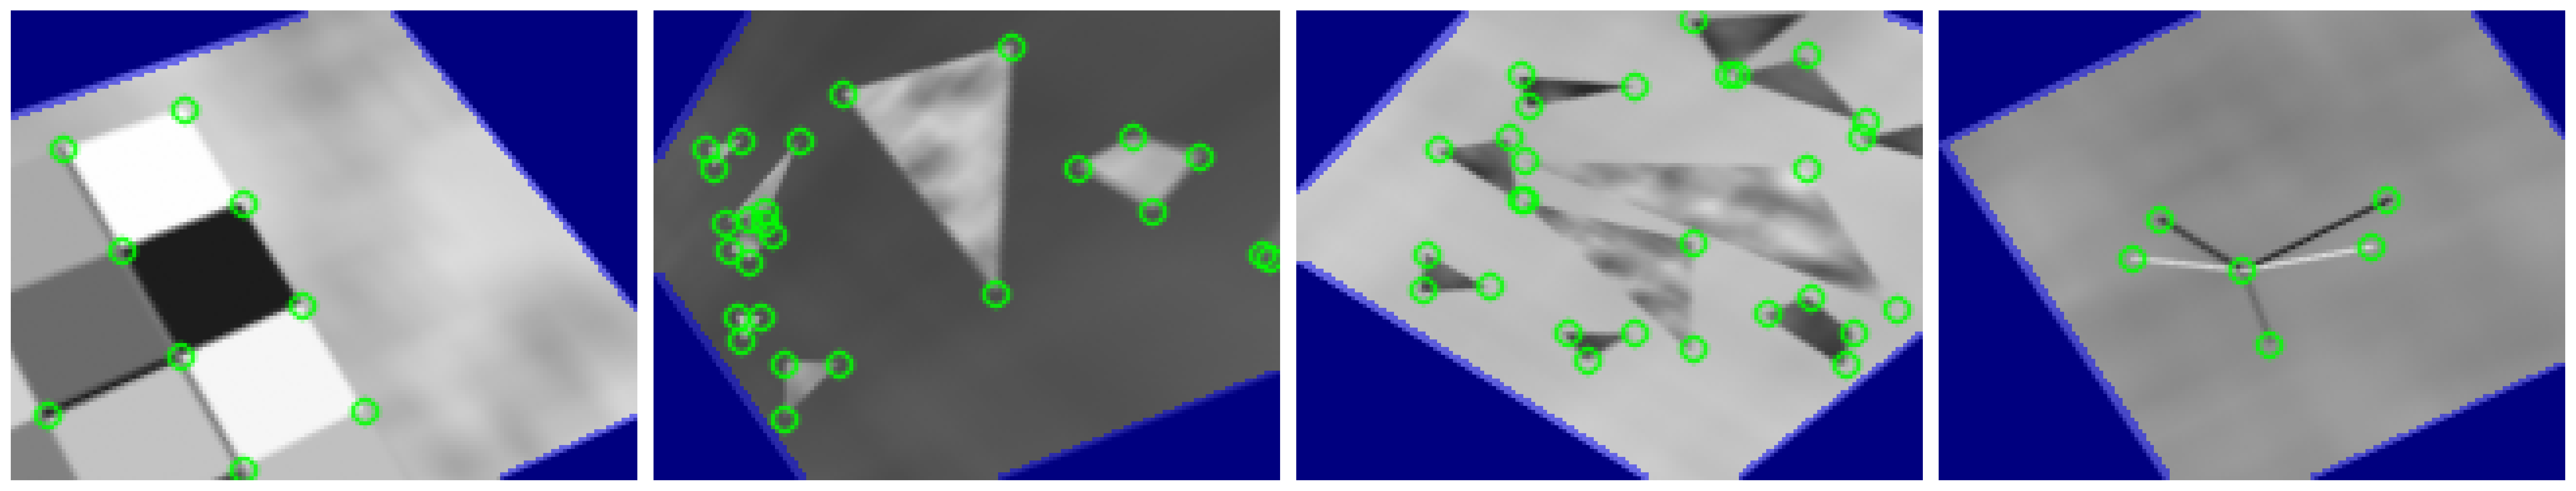

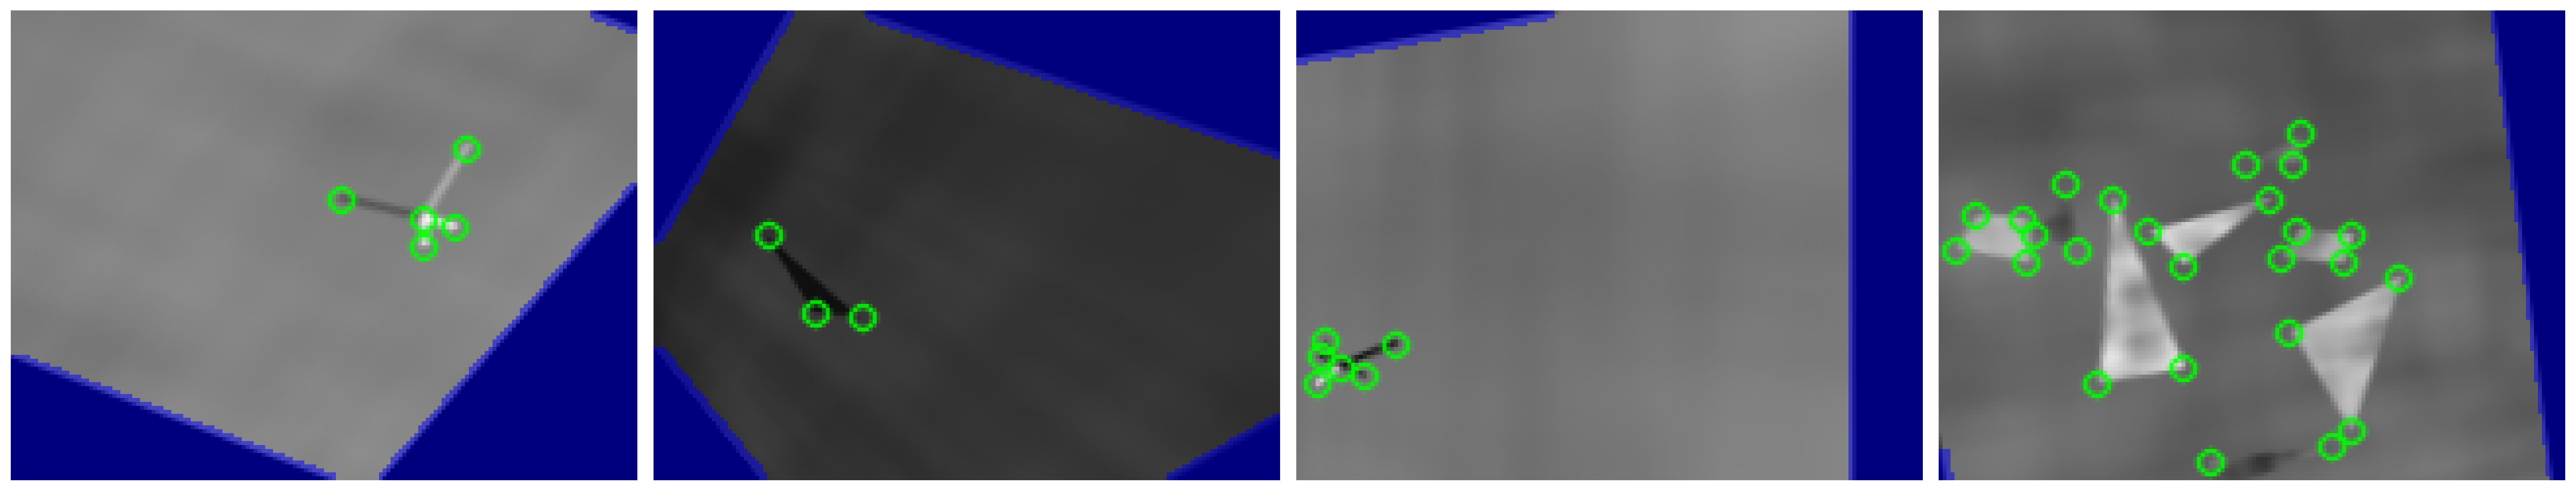

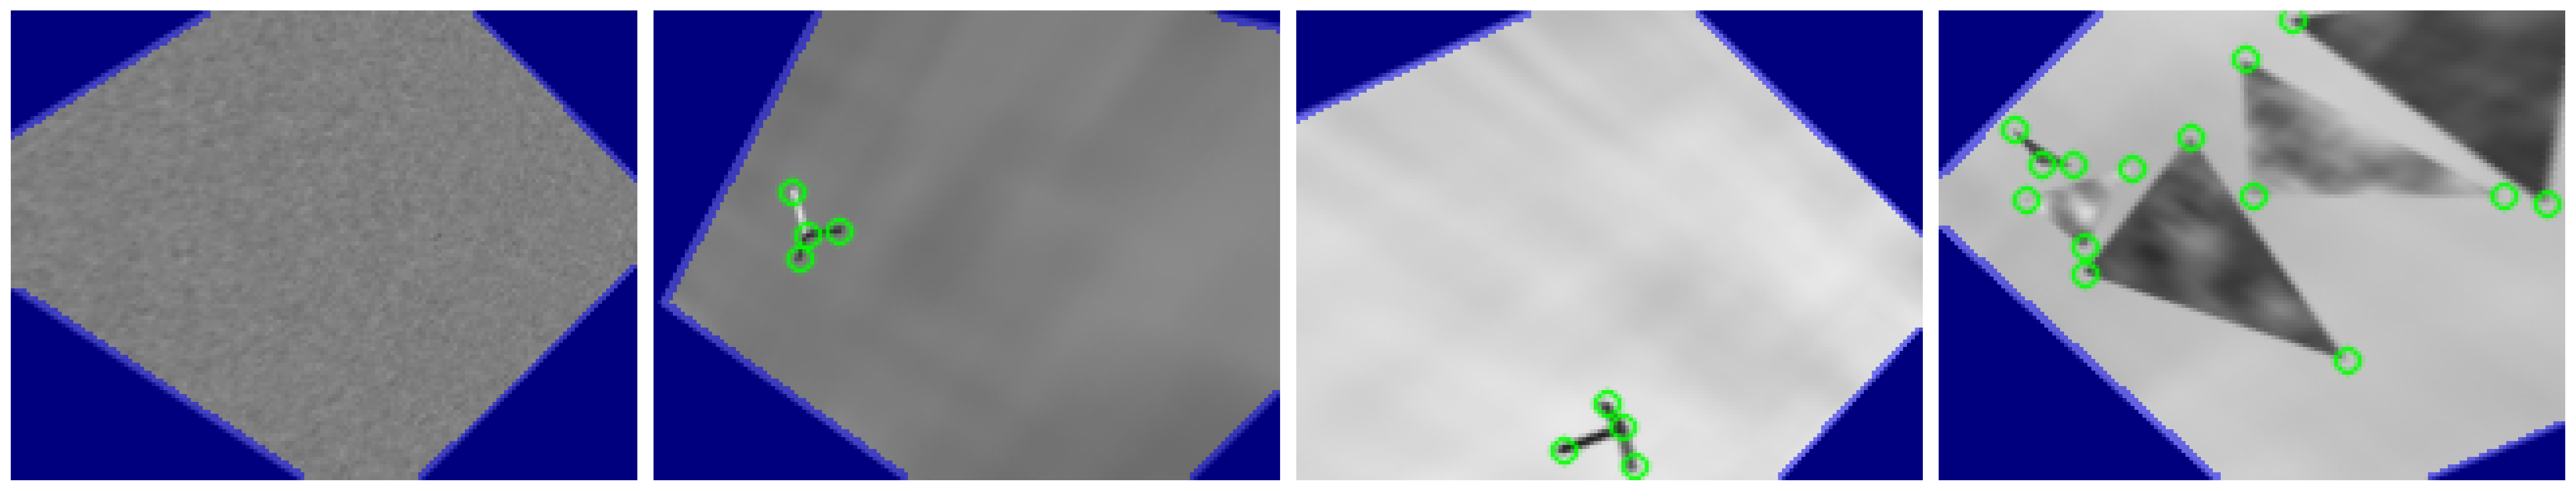

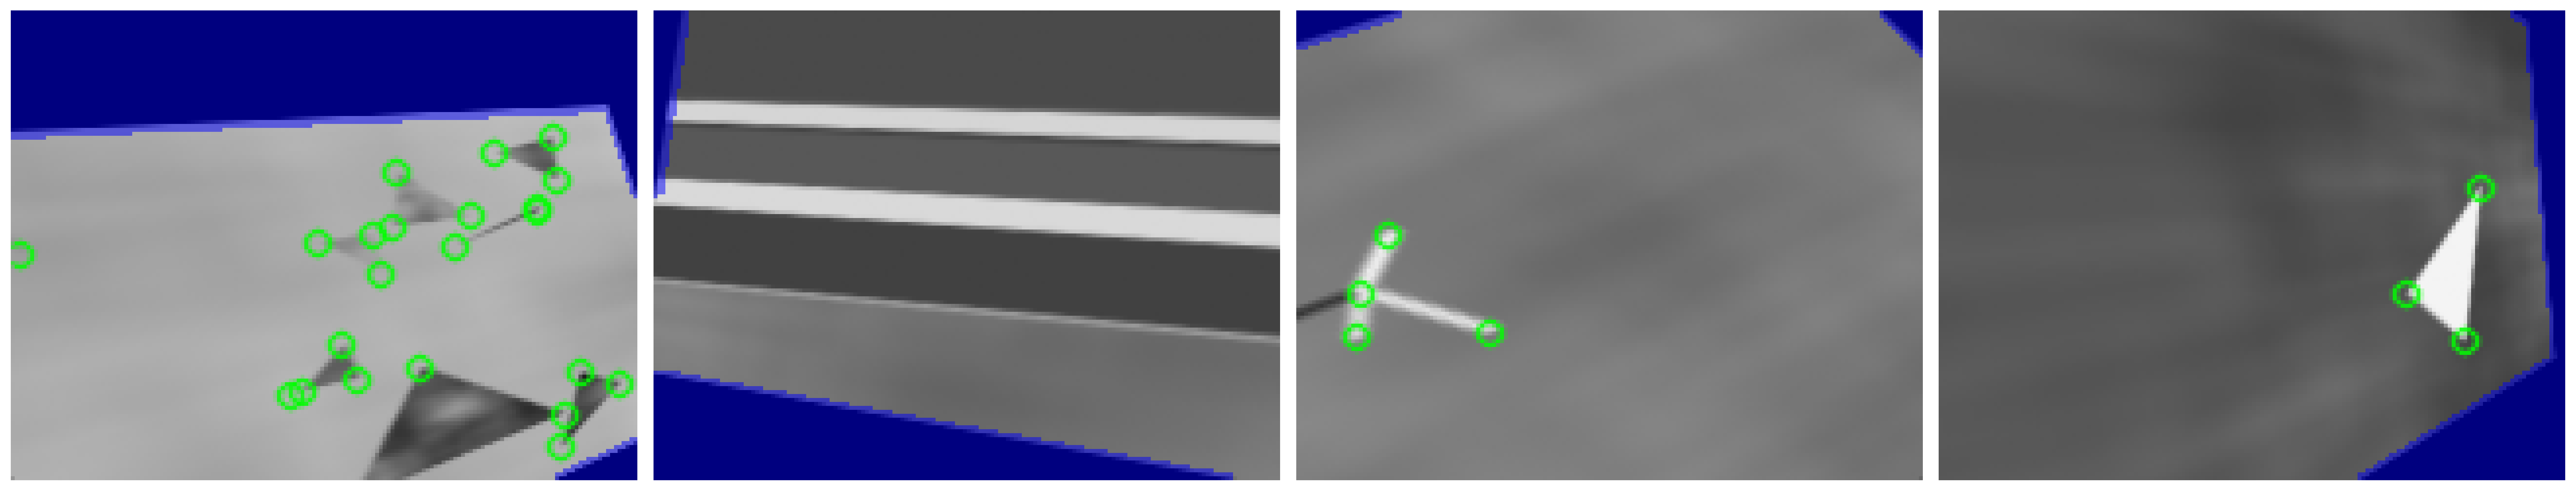

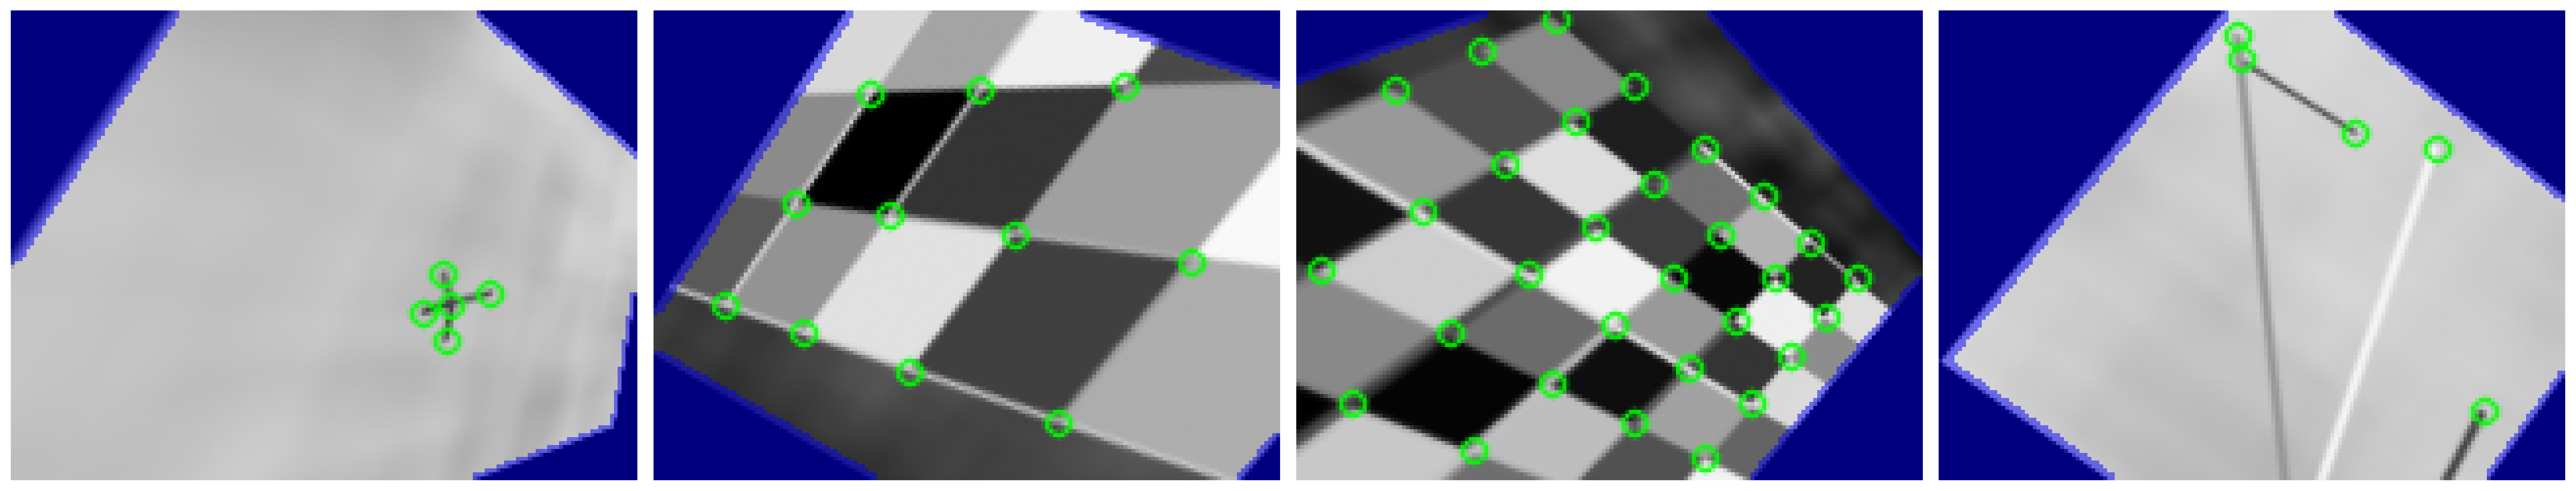

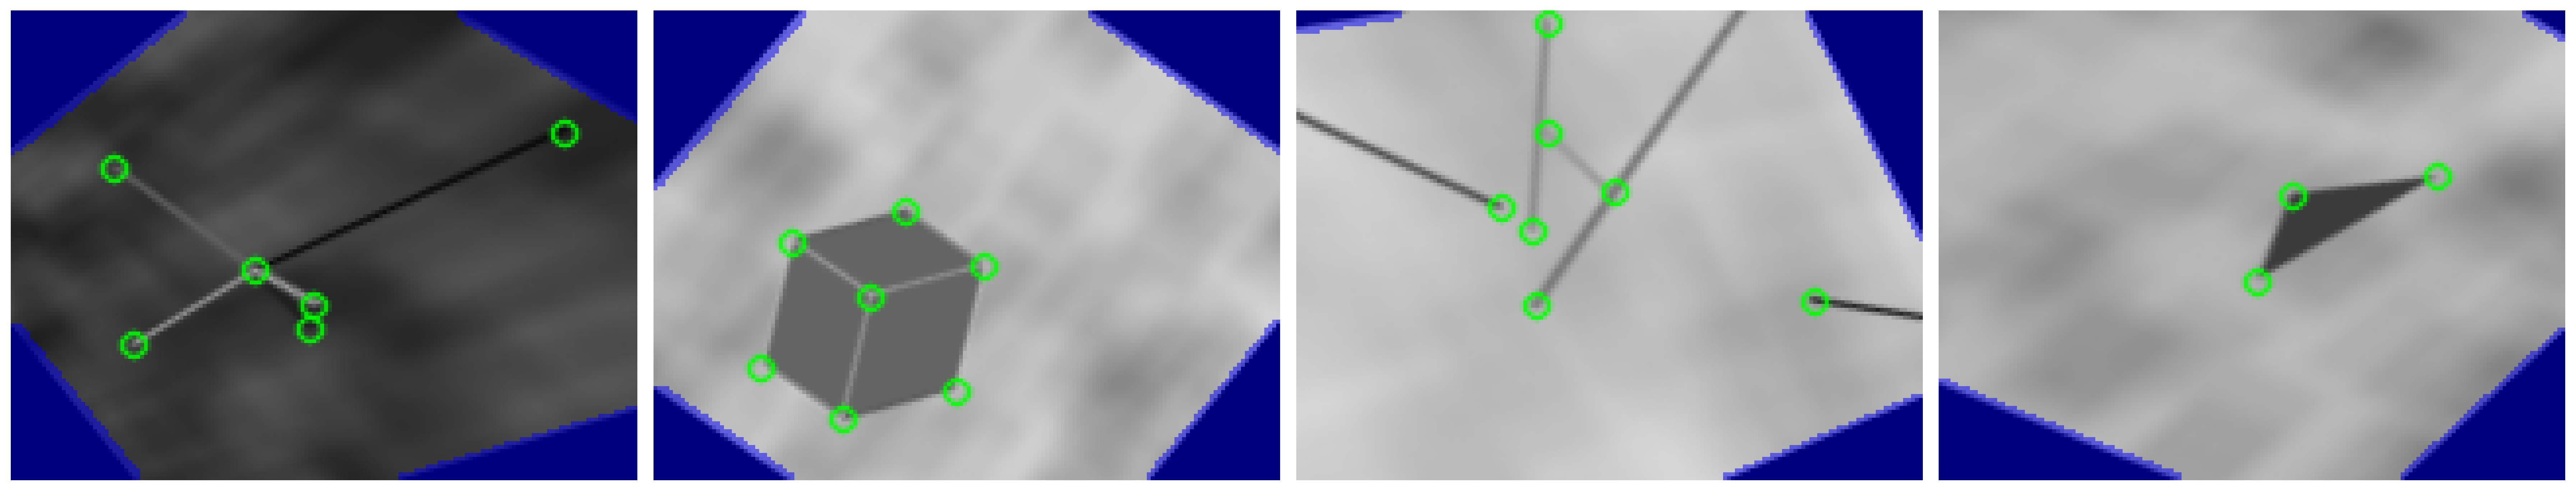

In [4]:
for i in range(20):
    plot_imgs([display(next(data_loader))/255. for _ in range(4)], dpi=300)